In [223]:
import os
os.chdir(r'C:\Users\metro\MachineLearning\Notebooks\Data')
os.getcwd()

'C:\\Users\\metro\\MachineLearning\\Notebooks\\Data'

In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

## BigMart DATA

In [408]:
BigMart = pd.read_csv('BigMart.csv',na_values='NA')

In [409]:
BigMart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


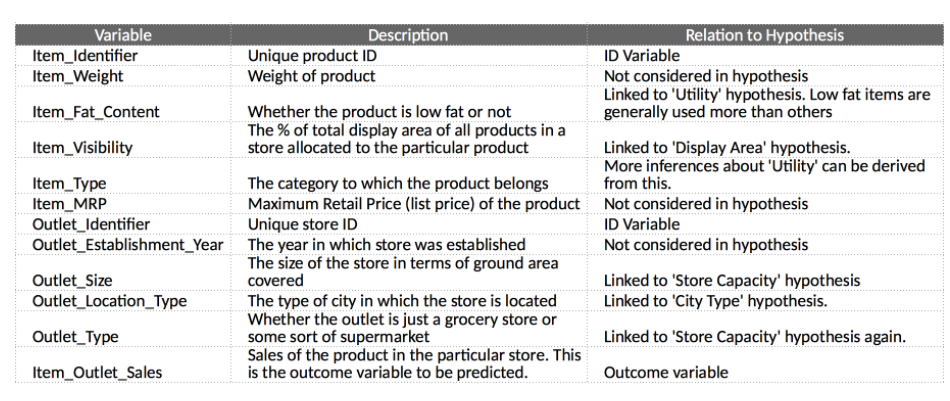

In [227]:
sum(BigMart.duplicated())#No duplicates 

0

## MISSING VALUES

In [228]:
BigMart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [229]:
missingrows = BigMart.isna().sum()
#Percentange of missing values 
for column in BigMart.columns:
    print('Percentage of missing values in {} is {}'.format(column,missingrows[column]/len(BigMart)))

Percentage of missing values in Item_Identifier is 0.0
Percentage of missing values in Item_Weight is 0.1716531737651062
Percentage of missing values in Item_Fat_Content is 0.0
Percentage of missing values in Item_Visibility is 0.0
Percentage of missing values in Item_Type is 0.0
Percentage of missing values in Item_MRP is 0.0
Percentage of missing values in Outlet_Identifier is 0.0
Percentage of missing values in Outlet_Establishment_Year is 0.0
Percentage of missing values in Outlet_Size is 0.2827642848762173
Percentage of missing values in Outlet_Location_Type is 0.0
Percentage of missing values in Outlet_Type is 0.0
Percentage of missing values in Item_Outlet_Sales is 0.0


#TREATING Outlet_Size MISSING VALUES, Placing MODE VALUE 

In [230]:
BigMart['Outlet_Size'].mode()[0]

'Medium'

In [231]:
BigMart.loc[BigMart['Outlet_Type']=='Grocery Store','Outlet_Size'].value_counts() #only small for grocery store

Small    528
Name: Outlet_Size, dtype: int64

In [232]:
BigMart['Outlet_Size']=BigMart['Outlet_Size'].fillna(BigMart['Outlet_Size'].mode()[0])

In [233]:
BigMart.astype('object').describe().transpose()

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Weight,7060,415,12.15,86
Item_Fat_Content,8523,5,Low Fat,5089
Item_Visibility,8523,7880,0,526
Item_Type,8523,16,Fruits and Vegetables,1232
Item_MRP,8523,5938,172.042,7
Outlet_Identifier,8523,10,OUT027,935
Outlet_Establishment_Year,8523,9,1985,1463
Outlet_Size,8523,3,Medium,5203
Outlet_Location_Type,8523,3,Tier 3,3350


#TREATING Item_Weight MISSING VALUES, Placing Weight with AVG Values for each ITEM ACCORDINGLY

In [234]:
item_avg_weight = BigMart.pivot_table(values='Item_Weight', index='Item_Identifier')
BigMart.set_index('Item_Identifier',inplace=True)
BigMart['Item_Weight'].fillna(item_avg_weight.Item_Weight,inplace=True)
BigMart.reset_index(inplace=True)

In [303]:
BigMart.pivot_table(values='Item_Weight', index='Item_Identifier')

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


#TREATING Item_Visibility which has 0 values, which can be considered as MISSING values,so replaced with Mean

In [235]:
BigMart['Item_Visibility']=BigMart['Item_Visibility'].replace(0,BigMart['Item_Visibility'].mean())

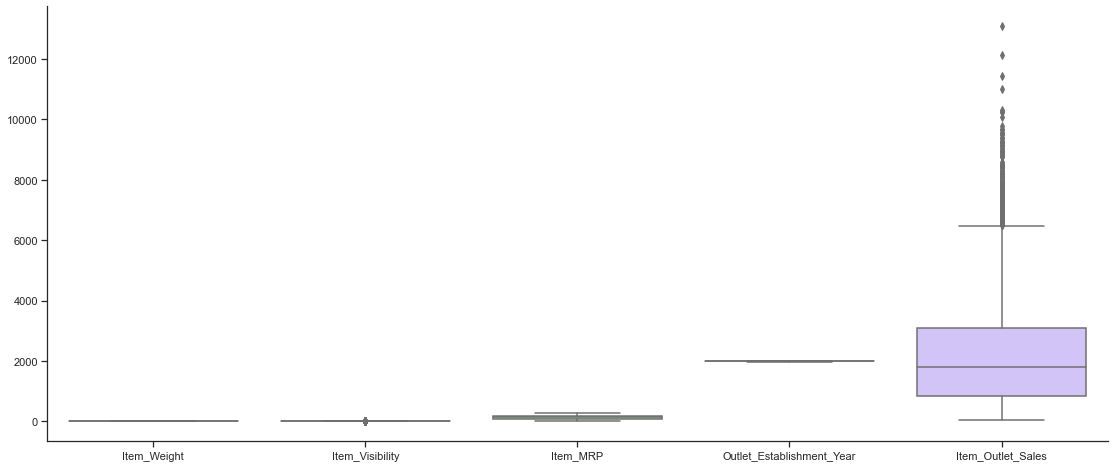

In [236]:
#TO FIND OUTLIERS PLOTTING BOXPLOT
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(19,8))
sns.boxplot(data=BigMart) #NO OUTLIERS AS SUCH
sns.despine() 

## CHECKING THE DISTRIBUTION OF NUMERICAL AND CATEGORICAL COLUMNS

In [237]:
#list of all the numeric columns
num = BigMart.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = BigMart.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  BigMart[num]
#categoric df
BM_cat = BigMart[cat]

print(num)
print(cat)

for category in cat:
    print(BigMart[category].value_counts())

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
FDW13    10
FDG33    10
FDV60     9
FDP25     9
FDQ40     9
         ..
FDQ60     1
FDN52     1
FDY43     1
FDO33     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                   

## PREPROCESSING

In [238]:
#replace the Item_Fat_Content 
BigMart['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat','Low Fat','Regular'],inplace = True)

In [239]:
#Subtracting the max year with Outlet_Establishment_Year to get total number of years
print(BigMart['Outlet_Establishment_Year'].max())
BigMart['Outlet_Establishment_Year'] = 2010-BigMart['Outlet_Establishment_Year']

2009


## MAPPING THE CATEGORICAL COLUMNS

In [240]:
#mapping for all ordinal variables
BigMart['Item_Fat_Content'] = BigMart['Item_Fat_Content'].map({ 
                                     'Low Fat':1, 
                                     'Regular':2
                                   })
BigMart['Outlet_Size'] = BigMart['Outlet_Size'].map({ 
                                     'Medium':2, 
                                     'Small':1,
                                     'High' : 3
                                   })
BigMart['Outlet_Location_Type'] = BigMart['Outlet_Location_Type'].map({ 
                                     'Tier 1':1, 
                                     'Tier 2':2,
                                     'Tier 3':3
                                   })
BigMart['Outlet_Type'] = BigMart['Outlet_Type'].map({ 
                                     'Grocery Store':1, 
                                     'Supermarket Type1':2,
                                     'Supermarket Type2':3,
                                     'Supermarket Type3':4
                                   })

In [241]:
BigMart.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [242]:
#4 missing values left for Item_Weight ,so dropped them
BigMart = BigMart.dropna(axis = 0)

## RECHECKING THE MISSING COLUMNS

In [243]:
BigMart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## CHECKING MULTICOLINEARITY

<AxesSubplot:>

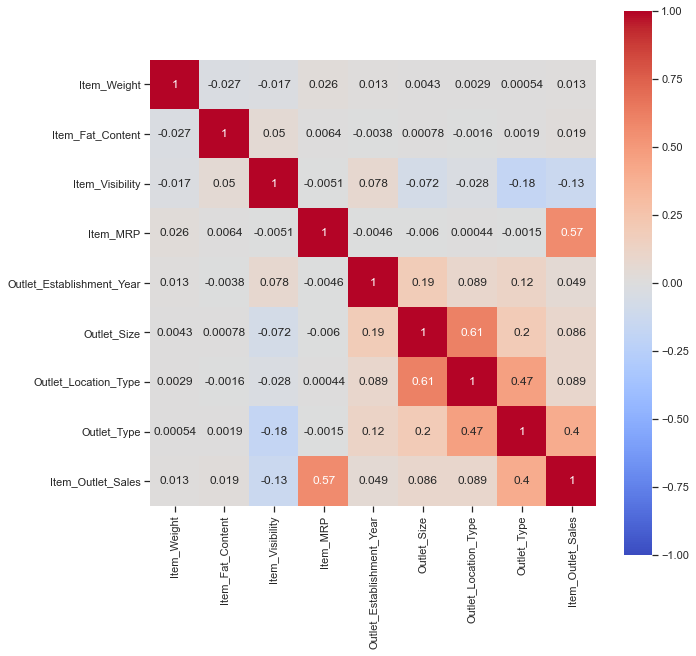

In [244]:
#CHECKING MULTICOLINEARITY
plt.figure(figsize=(10,10))
sns.heatmap(BigMart.corr("pearson"), vmin=-1, vmax=1, cmap='coolwarm', annot=True,  square=True)

In [245]:
#drop the columns having COLINEARITY with others
BigMart=BigMart.drop(['Outlet_Size','Outlet_Establishment_Year','Outlet_Location_Type','Item_Visibility'],axis=1)

## AFTER DROPPING MULTI CORRELATED COLUMNS ;PLOTTING GRAPH

<AxesSubplot:>

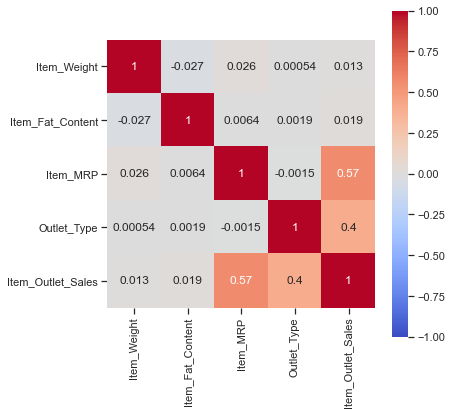

In [246]:
#CHECKING MULTICOLINEARITY
plt.figure(figsize=(6,6))
sns.heatmap(BigMart.corr("pearson"), vmin=-1, vmax=1, cmap='coolwarm', annot=True,  square=True)

In [247]:
BigMart_copy = BigMart[:]

In [248]:
BigMart_copy.shape

(8519, 8)

In [249]:
BigMart_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,Dairy,249.8092,OUT049,2,3735.1380
1,DRC01,5.920,2,Soft Drinks,48.2692,OUT018,3,443.4228
2,FDN15,17.500,1,Meat,141.6180,OUT049,2,2097.2700
3,FDX07,19.200,2,Fruits and Vegetables,182.0950,OUT010,1,732.3800
4,NCD19,8.930,1,Household,53.8614,OUT013,2,994.7052
...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,Snack Foods,214.5218,OUT013,2,2778.3834
8519,FDS36,8.380,2,Baking Goods,108.1570,OUT045,2,549.2850
8520,NCJ29,10.600,1,Health and Hygiene,85.1224,OUT035,2,1193.1136
8521,FDN46,7.210,2,Snack Foods,103.1332,OUT018,3,1845.5976


## Item_Type DUMMY VARIABLE ENCODING

In [250]:
#Dummy variable encoding for Item_Type variable 
BigMart = pd.get_dummies(BigMart,columns=['Item_Type'],drop_first=True)

In [251]:
#SHUFFLE THE DATA
BigMart = BigMart.sample(frac=1).reset_index(drop=True)

## TRAIN AND TEST SPLIT

In [252]:
#extract dependent and independent variables and dropping IDENTITY COLUMN
X_b = BigMart.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_b = BigMart.Item_Outlet_Sales

In [253]:
X_b

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,10.800,1,98.4042,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,8.050,2,112.2518,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,13.500,2,60.9562,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,17.750,1,239.3196,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9.000,1,264.8884,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,7.750,2,32.9558,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8515,12.600,2,248.6092,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8516,11.500,2,194.6820,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8517,7.235,1,115.8834,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [254]:
#STANDARDISING ALL THE X COLUMNS for RUNNING MODELS SUCH AS SVM TO RUN FASTER,KNN works better with scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_b_scaled = sc.fit_transform(X_b)

In [255]:
#TRASNFORMED TO DATAFRAME TO RUN OLS MODEL 
X_b_scaled_transformed = pd.DataFrame(StandardScaler().fit_transform(X_b_scaled))

In [256]:
X_b_scaled_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.446728,-0.737846,-0.684102,-1.508874,-0.174235,-0.114373,-0.287167,-0.294762,-0.334007,-0.411179,-0.160523,-0.254967,-0.345825,4.364024,-0.142266,-0.087003,-0.404719,-0.234766,-0.132966
1,-1.038657,1.355297,-0.461757,-0.252241,-0.174235,-0.114373,-0.287167,3.392572,-0.334007,-0.411179,-0.160523,-0.254967,-0.345825,-0.229146,-0.142266,-0.087003,-0.404719,-0.234766,-0.132966
2,0.134439,1.355297,-1.285387,-0.252241,-0.174235,-0.114373,-0.287167,3.392572,-0.334007,-0.411179,-0.160523,-0.254967,-0.345825,-0.229146,-0.142266,-0.087003,-0.404719,-0.234766,-0.132966
3,1.049239,-0.737846,1.578511,-0.252241,-0.174235,-0.114373,-0.287167,-0.294762,-0.334007,-0.411179,-0.160523,3.922078,-0.345825,-0.229146,-0.142266,-0.087003,-0.404719,-0.234766,-0.132966
4,-0.834173,-0.737846,1.989058,-0.252241,-0.174235,-0.114373,-0.287167,-0.294762,-0.334007,-0.411179,-0.160523,3.922078,-0.345825,-0.229146,-0.142266,-0.087003,-0.404719,-0.234766,-0.132966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,-1.103231,1.355297,-1.734976,1.004392,-0.174235,-0.114373,-0.287167,-0.294762,2.993951,-0.411179,-0.160523,-0.254967,-0.345825,-0.229146,-0.142266,-0.087003,-0.404719,-0.234766,-0.132966
8515,-0.059283,1.355297,1.727670,-0.252241,-0.174235,-0.114373,-0.287167,-0.294762,-0.334007,2.432031,-0.160523,-0.254967,-0.345825,-0.229146,-0.142266,-0.087003,-0.404719,-0.234766,-0.132966
8516,-0.296055,1.355297,0.861786,1.004392,-0.174235,-0.114373,-0.287167,-0.294762,2.993951,-0.411179,-0.160523,-0.254967,-0.345825,-0.229146,-0.142266,-0.087003,-0.404719,-0.234766,-0.132966
8517,-1.214083,-0.737846,-0.403446,-0.252241,-0.174235,-0.114373,-0.287167,-0.294762,-0.334007,-0.411179,-0.160523,-0.254967,-0.345825,-0.229146,-0.142266,-0.087003,2.470848,-0.234766,-0.132966


In [257]:
allcolums=X_b_scaled_transformed

In [258]:
#K FOLD VALUES FOR ALL THE REGRESSION MODELS CHOSSEN ;CHOOSEN K = 5
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor


Linear_score = cross_val_score(LinearRegression(), allcolums, y_b, cv = 5).mean()
KNN_score = cross_val_score(KNeighborsRegressor(), allcolums, y_b, cv = 5).mean()
RandomForest_score=cross_val_score(RandomForestRegressor(),allcolums,y_b.values.ravel(),cv=5).mean()
AdaBoost_score=cross_val_score(AdaBoostRegressor(),allcolums,y_b.values.ravel(),cv=5).mean()
SVR_score=cross_val_score(SVR(),allcolums,y_b.values.ravel(),cv=5).mean()

print('Linear_score',Linear_score)
print('KNN_score',KNN_score)
print('RandomForest_score',RandomForest_score)
print('AdaBoost_score',AdaBoost_score)
print('SVR_score',SVR_score)

Linear_score 0.48201133112175
KNN_score 0.5070683851953806
RandomForest_score 0.5184224478816697
AdaBoost_score 0.4641160539704147
SVR_score 0.01011136608709553


## OLS MODEL WHICH GIVES P VALUES

In [259]:
import statsmodels.api as sm
X_b_scaled_transformed = sm.add_constant(X_b_scaled_transformed) 
ols = sm.OLS(y_b,X_b_scaled_transformed)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     420.7
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        13:29:16   Log-Likelihood:                -72664.
No. Observations:                8519   AIC:                         1.454e+05
Df Residuals:                    8499   BIC:                         1.455e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2181.1888     13.287    164.158      0.0

In [260]:
maxp = lr.pvalues.max()
while(maxp > 0.05):
    X_b_scaled_transformed.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y_b,X_b_scaled_transformed)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     3997.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        13:29:27   Log-Likelihood:                -72668.
No. Observations:                8519   AIC:                         1.453e+05
Df Residuals:                    8516   BIC:                         1.454e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2181.1888     13.281    164.239      0.0

In [261]:
#REMOVING THE CONSTANT COLUMN
X_b_scaled_transformed=X_b_scaled_transformed.drop('const',axis=1) #we dont need constant column for sklearn package

# CROSS VALIDATION FOR ALL MODELS WITH DEFAULT PARAMETERS

In [262]:
#K FOLD VALUES FOR ALL THE REGRESSION MODELS CHOSSEN ;CHOOSEN K = 5
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor


Linear_score = cross_val_score(LinearRegression(), X_b_scaled_transformed, y_b, cv = 5).mean()
KNN_score = cross_val_score(KNeighborsRegressor(), X_b_scaled_transformed, y_b, cv = 5).mean()
RandomForest_score=cross_val_score(RandomForestRegressor(),X_b_scaled_transformed,y_b.values.ravel(),cv=5).mean()
AdaBoost_score=cross_val_score(AdaBoostRegressor(),X_b_scaled_transformed,y_b.values.ravel(),cv=5).mean()
SVR_score=cross_val_score(SVR(),X_b_scaled_transformed,y_b.values.ravel(),cv=5).mean()

print('Linear_score',Linear_score)
print('KNN_score',KNN_score)
print('RandomForest_score',RandomForest_score)
print('AdaBoost_score',AdaBoost_score)
print('SVR_score',SVR_score)

Linear_score 0.48352506636096154
KNN_score 0.5238463659514
RandomForest_score 0.4247303043998135
AdaBoost_score 0.5362166624585007
SVR_score 0.2154631714248417


## CROSS VALIDATE :: TEST SCORES with DIFFERENT Parameters

In [263]:
models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVR" : SVR()
}
 
KNNscore1 = []
KNNscore2 = []
RDscore = [] 
ADscore = [] 
SVRscore= []

for name, model in models.items():
     
     if(name=='K-Nearest Neighbors'):
            for i in range(3,11,1):
               knn1 = KNeighborsRegressor(n_neighbors=i, weights='uniform')  
               KNNscore1.append(cross_val_score(knn1,X_b_scaled_transformed,y_b,cv=5).mean())
            
            for i in range(11,30,1):
                    knn2 = KNeighborsRegressor(n_neighbors=i, weights='distance') #uniform and #distance showing 40 percentage 
                    KNNscore2.append(cross_val_score(knn2,X_b_scaled_transformed,y_b,cv=5).mean())    
                  
     if(name=='RandomForestRegressor'):
             for i in range(100,200,10):
                    model = RandomForestRegressor(n_estimators=i,max_depth=5,random_state=42)
                    kfold_score = cross_val_score(model, X_b_scaled_transformed, y_b, cv = 5).mean()
                    RDscore.append(kfold_score)  
     if(name=='AdaBoostRegressor'):
            for i in range(1,101,10):
                ADscore.append(cross_val_score(AdaBoostRegressor(n_estimators=i,random_state=42), X_b_scaled_transformed,y_b,cv=5).mean())
     
     if(name=='SVR'): 
             kernel = ['linear','rbf','poly','sigmoid']
             for k in kernel:
                  SVRscore.append(cross_val_score(SVR(kernel=k),X_b_scaled_transformed,y_b,cv=5).mean())
        
    

### KNNSCORE WITH UNIFORM WEIGHTS

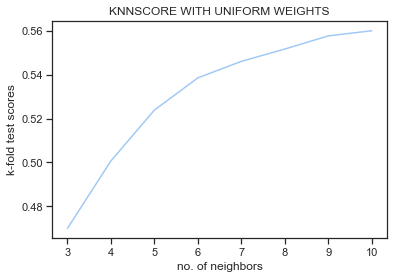

[0.4699341141104821, 0.5006843235930253, 0.5238463659514, 0.5385463711512152, 0.5460617715197975, 0.5516767920356603, 0.5576695973218521, 0.5600145535421122]


In [264]:
import matplotlib.pyplot as plt
plt.plot(range(3,11,1),KNNscore1)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.title('KNNSCORE WITH UNIFORM WEIGHTS')
plt.show()
print(KNNscore1)

### KNNSCORE WITH DISTANCE WEIGHTS

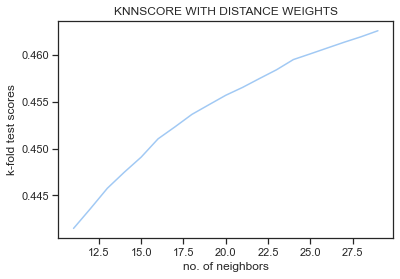

[0.4414687442545171, 0.4435826492485039, 0.44575635421754384, 0.4474673670451598, 0.44908135958059325, 0.45103501856267975, 0.45231446446453755, 0.45364408906688547, 0.4546681137325064, 0.45568307768732774, 0.4565282631305216, 0.4574752100618835, 0.4584028412095301, 0.4594971996138163, 0.46010571574211595, 0.46072812833906235, 0.46134587966110585, 0.4619307128165726, 0.4625749000832817]


In [265]:
import matplotlib.pyplot as plt
plt.plot(range(11,30,1),KNNscore2)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.title('KNNSCORE WITH DISTANCE WEIGHTS')
plt.show()
print(KNNscore2)

### RANDOMFOREST KFOLD SCORE

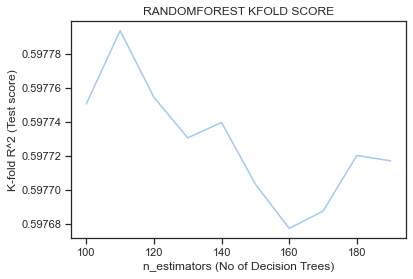

[0.5977504831712579, 0.5977934681920323, 0.5977543608730131, 0.5977305844741265, 0.5977396044846564, 0.5977033862215484, 0.5976774404912293, 0.5976875135200048, 0.5977202211755733, 0.5977170861235376]


In [266]:
import matplotlib.pyplot as plt
plt.plot(range(100,200,10),RDscore)
plt.xlabel('n_estimators (No of Decision Trees)')
plt.ylabel('K-fold R^2 (Test score)')
plt.title('RANDOMFOREST KFOLD SCORE')
plt.show()
print(RDscore)

### ADaBoost K FOLD SCORE

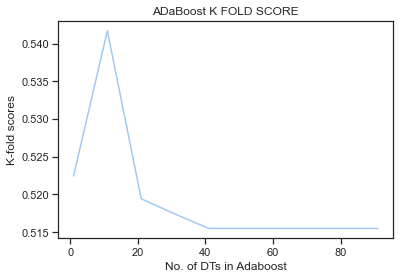

[0.5224522600802477, 0.5417072312840439, 0.5194274325419223, 0.517402916916607, 0.515498081255992, 0.515498081255992, 0.515498081255992, 0.515498081255992, 0.515498081255992, 0.515498081255992]


In [267]:
plt.plot(range(1,101,10),ADscore )
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.title('ADaBoost K FOLD SCORE')
plt.show()
print(ADscore)


### SVR KFOLD SCORE 

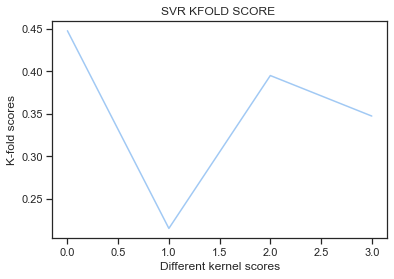

[0.4478135998435917, 0.2154631714248417, 0.3951532304959888, 0.3475227856697879]


In [268]:
plt.plot(range(len(kernel)),SVRscore )
plt.xlabel('Different kernel scores')
plt.ylabel('K-fold scores')
plt.title('SVR KFOLD SCORE ')
plt.show()
print(SVRscore)

## Splitting and tunning with GridSearchCV ,with Regularization

In [269]:
#For cross-validation using train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_b_scaled_transformed,y_b,random_state=42,test_size=0.20)

# LinearRegression

In [270]:
#LinearRegression imported 
Lmodel = LinearRegression()
Lmodel.fit(X_train,y_train)

LinearRegression()

# KNeighborsRegressor

In [377]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_neighbors': [39,40,41,42],
            'weights': ['distance','uniform']
        }
KNNmodel = GridSearchCV(KNeighborsRegressor(), params,cv=5)
KNNmodel.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [39, 40, 41, 42],
                         'weights': ['distance', 'uniform']})

In [378]:
print(KNNmodel.best_estimator_)#default taking uniform distance
print(KNNmodel.best_score_)
print(KNNmodel.score(X_train,y_train))

KNeighborsRegressor(n_neighbors=40)
0.5928189427528453
0.6113691481737964


In [379]:
KNNmodel.score(X_test,y_test)

0.6015316448741287

# RandomForestRegressor

In [274]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [110,120,130],
            'max_depth': [4,5,6]
        }
RDmodel = GridSearchCV(RandomForestRegressor(random_state=42), params,cv=5)
RDmodel.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6],
                         'n_estimators': [110, 120, 130]})

In [397]:
print(RDmodel.best_params_)
print(RDmodel.best_score_)

{'max_depth': 5, 'n_estimators': 120}
0.5950651048170079


In [402]:
Randomforest =RDmodel.best_estimator_
#print(Randomforest.fit(X_train,y_train))
print(RDmodel.score(X_train,y_train)) #TRAIN SCORE
print(Randomforest.score(X_test,y_test)) #TEST SCORE

0.6062578290685277
0.6048699714423966


# AdaBoostRegressor

In [278]:
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [5,10,15],
            'base_estimator': [DecisionTreeRegressor(max_depth=4,random_state=0),
                               DecisionTreeRegressor(max_depth=5,random_state=0),
                               DecisionTreeRegressor(max_depth=6,random_state=0)]
        }
ADmodel = GridSearchCV(AdaBoostRegressor(random_state=42), params,cv=4)
ADmodel.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(random_state=42),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=4,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=5,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=6,
                                                                  random_state=0)],
                         'n_estimators': [5, 10, 15]})

In [399]:
print(ADmodel.best_params_) #Decreasing n_estimators and max_depth caused train score more but not the Test score
print(ADmodel.best_score_) 

{'base_estimator': DecisionTreeRegressor(max_depth=6, random_state=0), 'n_estimators': 5}
0.5799235350915319


In [401]:
AdaBoost =ADmodel.best_estimator_
#print(AdaBoost.fit(X_train,y_train))
print(AdaBoost.score(X_train,y_train))#TRAIN SCORE
print(AdaBoost.score(X_test,y_test))#TEST SCORE

0.6069482238615138
0.6018721859757116


# SVR without Regularization

In [281]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'poly', 'rbf'),'degree':(1,2,3,4),'gamma':('scale', 'auto')}

sgd1 = SVR()
reg1= GridSearchCV(sgd1,param_grid=parameters)

In [282]:
reg1.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'degree': (1, 2, 3, 4), 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf')})

In [283]:
print(reg1.best_params_)
print(reg1.best_score_)

{'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.437854740658046


In [403]:
svm1 =reg1.best_estimator_
svm1.fit(X_train,y_train)
print(svm1.score(X_train,y_train))
print(svm1.score(X_test,y_test))

0.44658519910258754
0.4375299544890451


# SVR with Regularization

In [285]:
parameters = {'kernel':('linear', 'poly', 'rbf'),'degree':(1,2,3,4),'gamma':('scale', 'auto'),
               'C': [10,100]
             }


sgd2 = SVR()
reg2= GridSearchCV(sgd2,param_grid=parameters,cv=5)#default cv=5

In [286]:
reg2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [10, 100], 'degree': (1, 2, 3, 4),
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf')})

In [287]:
print(reg2.best_params_)
print(reg2.best_score_)

{'C': 100, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.5876501087294346


In [388]:
svm2 =reg2.best_estimator_
svm2.fit(X_train,y_train)
print(svm2.score(X_train,y_train)) #TRAIN SCORE
print(svm2.score(X_test,y_test)) #TEST SCORE

0.5928838425158722
0.601232185606502


## FOR ALL THE MODELS, BEST ESTIMTORS  R2 SCORE ,RMSE ,ADJUSTED R2 below 

In [389]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import math

#FOR ADJUSTED R2
n = len(X_test)#TOTAL size of the TEST SET is 2628
k = len(X_test.iloc[0]) #All the Variables in X TEST SET here it is 15 (MultiVarient)

print("-----------------------------------------------------------------------------------------")
print('LINEAR REGRESSION')
#LINEAR REGRESSION
y_Lpred = Lmodel.predict(X_test)
print('LINEAR TRAIN SCORE :',Lmodel.score(X_train,y_train))
print('LINEAR TEST SCORE :', Lmodel.score(X_test,y_test))
print('LINEAR R SQUARE :',r2_score(y_test,y_Lpred)) #R^2 #R2 score for the y Variable i,e is  Rented Bike Count
#print('MSE :',mean_squared_error(y_test,y_pred)) #MSE #RESIDUAL ERROR
print( 'LINEAR RMSE :',math.sqrt(mean_squared_error(y_test,y_Lpred)))
Adj_LR2 = 1 - ((n-1)*(1- (r2_score(y_test,y_Lpred))))/(n-k-1)
print( 'LINEAR ADJUSTED R2 :',Adj_LR2)
Ltrain=Lmodel.score(X_train,y_train)*100

print("-----------------------------------------------------------------------------------------")
#KNeighborsRegressor
print('KNeighborsRegressor')
y_KNNpred = KNNmodel.predict(X_test)
print('KNeighborsRegressor BEST SCORE :',KNNmodel.best_score_ ,'WITH BEST PARAM',KNNmodel.best_estimator_)
print('KNeighborsRegressor TRAIN SCORE :', KNNmodel.score(X_train,y_train))
print('KNeighborsRegressor TEST SCORE :', KNNmodel.score(X_test,y_test))
print('KNeighborsRegressor R SQUARE :',r2_score(y_test,y_KNNpred)) #R^2 #R2 score for the y Variable i,e is  Rented Bike Count
#print('MSE :',mean_squared_error(y_test,y_pred)) #MSE #RESIDUAL ERROR
print( 'KNeighborsRegressor RMSE :',math.sqrt(mean_squared_error(y_test,y_KNNpred)))
Adj_KNNR2 = 1 - ((n-1)*(1- (r2_score(y_test,y_KNNpred))))/(n-k-1)
print( 'KNeighborsRegressor ADJUSTED R2 :',Adj_KNNR2)
KNNtrain=KNNmodel.score(X_train,y_train)*100

-----------------------------------------------------------------------------------------
LINEAR REGRESSION
LINEAR TRAIN SCORE : 0.4816473518380979
LINEAR TEST SCORE : 0.490965246068666
LINEAR R SQUARE : 0.490965246068666
LINEAR RMSE : 1276.9004043078303
LINEAR ADJUSTED R2 : 0.4903667337183646
-----------------------------------------------------------------------------------------
KNeighborsRegressor
KNeighborsRegressor BEST SCORE : 0.5928189427528453 WITH BEST PARAM KNeighborsRegressor(n_neighbors=40)
KNeighborsRegressor TRAIN SCORE : 0.6113691481737964
KNeighborsRegressor TEST SCORE : 0.6015316448741287
KNeighborsRegressor R SQUARE : 0.6015316448741287
KNeighborsRegressor RMSE : 1129.7444741714808
KNeighborsRegressor ADJUSTED R2 : 0.6010631341685133


In [390]:
print("-----------------------------------------------------------------------------------------")
#RANDOMFOREST
y_RDpred = RDmodel.predict(X_test)
print('RANDOMFOREST BEST SCORE :',RDmodel.best_score_ ,'WITH BEST PARAM',RDmodel.best_estimator_)
print('RANDOMFOREST TRAIN SCORE :', Randomforest.score(X_train,y_train))
print('RANDOMFOREST TEST SCORE :', Randomforest.score(X_test,y_test))
print('RANDOMFOREST R SQUARE :',r2_score(y_test,y_RDpred)) #R^2 #R2 score for the y Variable i,e is  Rented Bike Count
#print('MSE :',mean_squared_error(y_test,y_pred)) #MSE #RESIDUAL ERROR
print( 'RANDOMFOREST RMSE :',math.sqrt(mean_squared_error(y_test,y_RDpred)))
Adj_RDR2 = 1 - ((n-1)*(1- (r2_score(y_test,y_RDpred))))/(n-k-1)
print( 'RANDOMFOREST ADJUSTED R2 :',Adj_RDR2)
RDtrain=Randomforest.score(X_train,y_train)*100


print("-----------------------------------------------------------------------------------------")
#ADaBOOST
y_ADpred = ADmodel.predict(X_test)
print('AdaBoost BEST SCORE :',ADmodel.best_score_ ,'WITH BEST PARAM',ADmodel.best_estimator_)
print('AdaBoost TRAIN SCORE :', AdaBoost.score(X_train,y_train))
print('AdaBoost TEST SCORE :', AdaBoost.score(X_test,y_test))
print('AdaBoost R SQUARE :',r2_score(y_test,y_ADpred)) #R^2 #R2 score for the y Variable i,e is  Rented Bike Count
#print('MSE :',mean_squared_error(y_test,y_pred)) #MSE #RESIDUAL ERROR
print( 'AdaBoost RMSE :',math.sqrt(mean_squared_error(y_test,y_ADpred)))
Adj_ADR2 = 1 - ((n-1)*(1- (r2_score(y_test,y_ADpred))))/(n-k-1)
print( 'AdaBoost ADJUSTED R2 :',Adj_ADR2)
ADatrain=AdaBoost.score(X_train,y_train)*100

-----------------------------------------------------------------------------------------
RANDOMFOREST BEST SCORE : 0.5950651048170079 WITH BEST PARAM RandomForestRegressor(max_depth=5, n_estimators=120, random_state=42)
RANDOMFOREST TRAIN SCORE : 0.6062578290685277
RANDOMFOREST TEST SCORE : 0.6048699714423966
RANDOMFOREST R SQUARE : 0.6048699714423966
RANDOMFOREST RMSE : 1125.0020794174372
RANDOMFOREST ADJUSTED R2 : 0.6044053858709003
-----------------------------------------------------------------------------------------
AdaBoost BEST SCORE : 0.5799235350915319 WITH BEST PARAM AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6,
                                                       random_state=0),
                  n_estimators=5, random_state=42)
AdaBoost TRAIN SCORE : 0.6069482238615138
AdaBoost TEST SCORE : 0.6018721859757116
AdaBoost R SQUARE : 0.6018721859757116
AdaBoost RMSE : 1129.2616169298285
AdaBoost ADJUSTED R2 : 0.6014040756711563


In [391]:
print("-----------------------------------------------------------------------------------------")
#LINEARSVR WITHOUT REGULAIRISATION
y_SVRLpred = svm1.predict(X_test)
print('LINEAR SVR WITHOUT REGULAIRISAITION BEST SCORE :',reg1.best_score_,'WITH BEST PARAM',reg1.best_estimator_)
print('LINEAR SVR WITHOUT REGULAIRISAITION TRAIN SCORE :',svm1.score(X_train,y_train))
print('LINEAR SVR WITHOUT REGULAIRISAITION TEST SCORE :', svm1.score(X_test,y_test))
print('LINEAR SVR WITHOUT REGULAIRISAITION R SQUARE :',r2_score(y_test,y_SVRLpred)) #R^2 #R2 score for the y Variable i,e is  Rented Bike Count
#print('MSE :',mean_squared_error(y_test,y_pred)) #MSE #RESIDUAL ERROR
print( 'LINEAR SVR WITHOUT REGULAIRISAITION RMSE :',math.sqrt(mean_squared_error(y_test,y_SVRLpred)))
Adj_SVRLR2 = 1 - ((n-1)*(1- (r2_score(y_test,y_SVRLpred))))/(n-k-1)
print( 'AdaBoost ADJUSTED R2 :',Adj_SVRLR2)


print("-----------------------------------------------------------------------------------------")
#LINEARSVR WITH REGULAIRISATION
y_SVRWRegpred = svm2.predict(X_test)
print('LINEAR SVR WITHOUT REGULAIRISAITION BEST SCORE :',reg2.best_score_,'WITH BEST PARAM',reg2.best_estimator_)
print('LINEAR SVR WITHOUT REGULAIRISAITION TRAIN SCORE :', svm2.score(X_train,y_train))
print('LINEAR SVR WITHOUT REGULAIRISAITION TEST SCORE :', svm2.score(X_test,y_test))
print('LINEAR SVR WITHOUT REGULAIRISAITION R SQUARE :',r2_score(y_test,y_SVRWRegpred)) #R^2 #R2 score for the y Variable i,e is  Rented Bike Count
#print('MSE :',mean_squared_error(y_test,y_pred)) #MSE #RESIDUAL ERROR
print( 'LINEAR SVR WITHOUT REGULAIRISAITION RMSE :',math.sqrt(mean_squared_error(y_test,y_SVRWRegpred)))
Adj_SVRWRegR2 = 1 - ((n-1)*(1- (r2_score(y_test,y_SVRWRegpred))))/(n-k-1)
print( 'AdaBoost ADJUSTED R2 :',Adj_SVRWRegR2)
svmtrain=svm2.score(X_train,y_train)*100

-----------------------------------------------------------------------------------------
LINEAR SVR WITHOUT REGULAIRISAITION BEST SCORE : 0.437854740658046 WITH BEST PARAM SVR(degree=1, kernel='linear')
LINEAR SVR WITHOUT REGULAIRISAITION TRAIN SCORE : 0.44658519910258754
LINEAR SVR WITHOUT REGULAIRISAITION TEST SCORE : 0.4375299544890451
LINEAR SVR WITHOUT REGULAIRISAITION R SQUARE : 0.4375299544890451
LINEAR SVR WITHOUT REGULAIRISAITION RMSE : 1342.2487454619372
AdaBoost ADJUSTED R2 : 0.4368686140475272
-----------------------------------------------------------------------------------------
LINEAR SVR WITHOUT REGULAIRISAITION BEST SCORE : 0.5876501087294346 WITH BEST PARAM SVR(C=100, degree=1, gamma='auto')
LINEAR SVR WITHOUT REGULAIRISAITION TRAIN SCORE : 0.5928838425158722
LINEAR SVR WITHOUT REGULAIRISAITION TEST SCORE : 0.601232185606502
LINEAR SVR WITHOUT REGULAIRISAITION R SQUARE : 0.601232185606502
LINEAR SVR WITHOUT REGULAIRISAITION RMSE : 1130.1689105285022
AdaBoost ADJUSTE

# SUMMARY OF ALL MODELS

In [392]:
listmodel=['Linear Regression','KNN','RandomForest','ADABOOST','SVR']
LIST_CV=[Linear_score*100,KNN_score*100,RandomForest_score*100,AdaBoost_score*100,SVR_score*100]
MODELS = pd.DataFrame(listmodel, columns=["MODEL"])
CVSCORES= pd.DataFrame(LIST_CV, columns=["CROSS VALIDATION SCORE"])

LIST_TRAINSCORE=[Ltrain,KNNtrain,RDtrain,ADatrain,svmtrain]
TRAINSCORES= pd.DataFrame(LIST_TRAINSCORE, columns=["TRAIN SCORE"])

LIST_TESTSCORE=[Lmodel.score(X_test,y_test)*100,KNNmodel.score(X_test,y_test)*100,Randomforest.score(X_test,y_test)*100,AdaBoost.score(X_test,y_test)*100,svm2.score(X_test,y_test)*100]
TESTSCORES= pd.DataFrame(LIST_TESTSCORE, columns=["TEST SCORE"])

model_strength=pd.concat([MODELS,CVSCORES,TRAINSCORES,TESTSCORES],axis=1)
#print(model_strength.sort_values(by=['TEST SCORE'],ascending=False))
model_strength


,MODEL,CROSS VALIDATION SCORE,TRAIN SCORE,TEST SCORE
0,Linear Regression,48.352507,48.164735,49.096525
1,KNN,52.384637,61.136915,60.153164
2,RandomForest,42.473030,60.625783,60.486997
3,ADABOOST,53.621666,60.694822,60.187219
4,SVR,21.546317,59.288384,60.123219


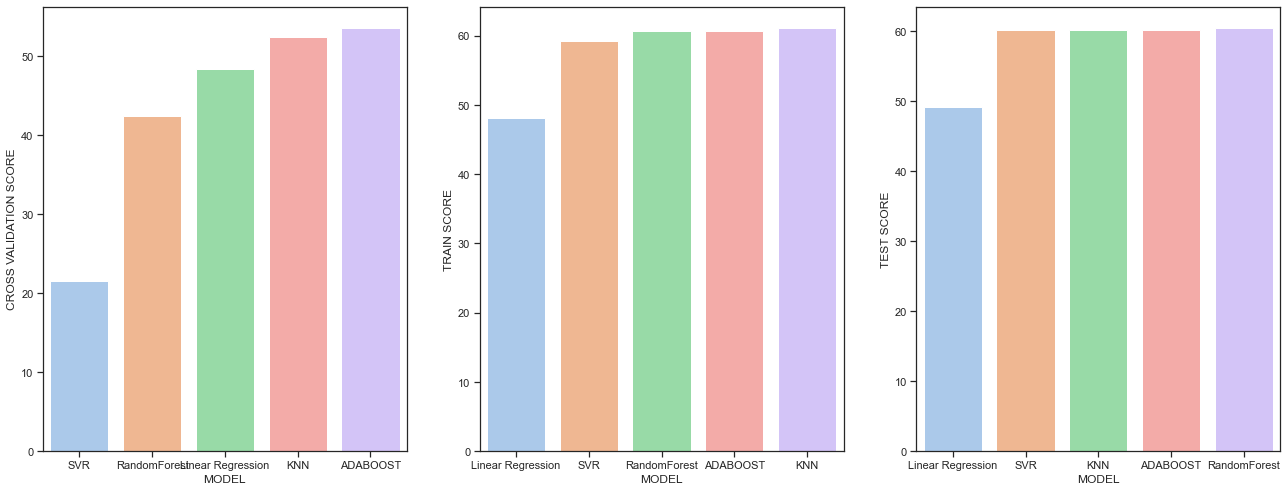

In [395]:
plt.figure(figsize=(30, 18))
plt.subplot(2,4,1)
sns.barplot(x ='MODEL' , y = 'CROSS VALIDATION SCORE', data = model_strength,order=model_strength.sort_values('CROSS VALIDATION SCORE').MODEL)
plt.subplot(2,4,2)
sns.barplot(x='MODEL',y='TRAIN SCORE', data = model_strength,order=model_strength.sort_values('TRAIN SCORE').MODEL)
plt.subplot(2,4,3)
sns.barplot(x='MODEL',y='TEST SCORE', data = model_strength,order=model_strength.sort_values('TEST SCORE').MODEL)

plt.show()

# SAVING DATASET FOR SPARK 

In [54]:
BigMart_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,Dairy,249.8092,OUT049,2,3735.1380
1,DRC01,5.920,2,Soft Drinks,48.2692,OUT018,3,443.4228
2,FDN15,17.500,1,Meat,141.6180,OUT049,2,2097.2700
3,FDX07,19.200,2,Fruits and Vegetables,182.0950,OUT010,1,732.3800
4,NCD19,8.930,1,Household,53.8614,OUT013,2,994.7052
...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,Snack Foods,214.5218,OUT013,2,2778.3834
8519,FDS36,8.380,2,Baking Goods,108.1570,OUT045,2,549.2850
8520,NCJ29,10.600,1,Health and Hygiene,85.1224,OUT035,2,1193.1136
8521,FDN46,7.210,2,Snack Foods,103.1332,OUT018,3,1845.5976


In [55]:
#TO IMPORT THE PREPROCESSED DATASET TO SPARK 
BigMart_copy.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
BigMart_copy.to_csv(r'C:\Users\metro\MachineLearning\Notebooks\Data\BigMart_copy.csv', index = False)